# Analytics


In [29]:
from joblib import load
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

clf = load('nyc_taxi_model copy.joblib') 
poly = load('nyc_taxi_features copy.joblib') 
scale = load('nyc_taxi_scale copy.joblib') 

# Test data
test = pd.read_csv('test.csv')
X_test = test[['OrigLat', 'OrigLon', 'DestLat', 'DestLon', 'pickup_time', 'Distance']].values
y_test = test['travel_time'].values
X_test_poly = poly.fit_transform(scale.fit_transform(X_test))

## Data analytics

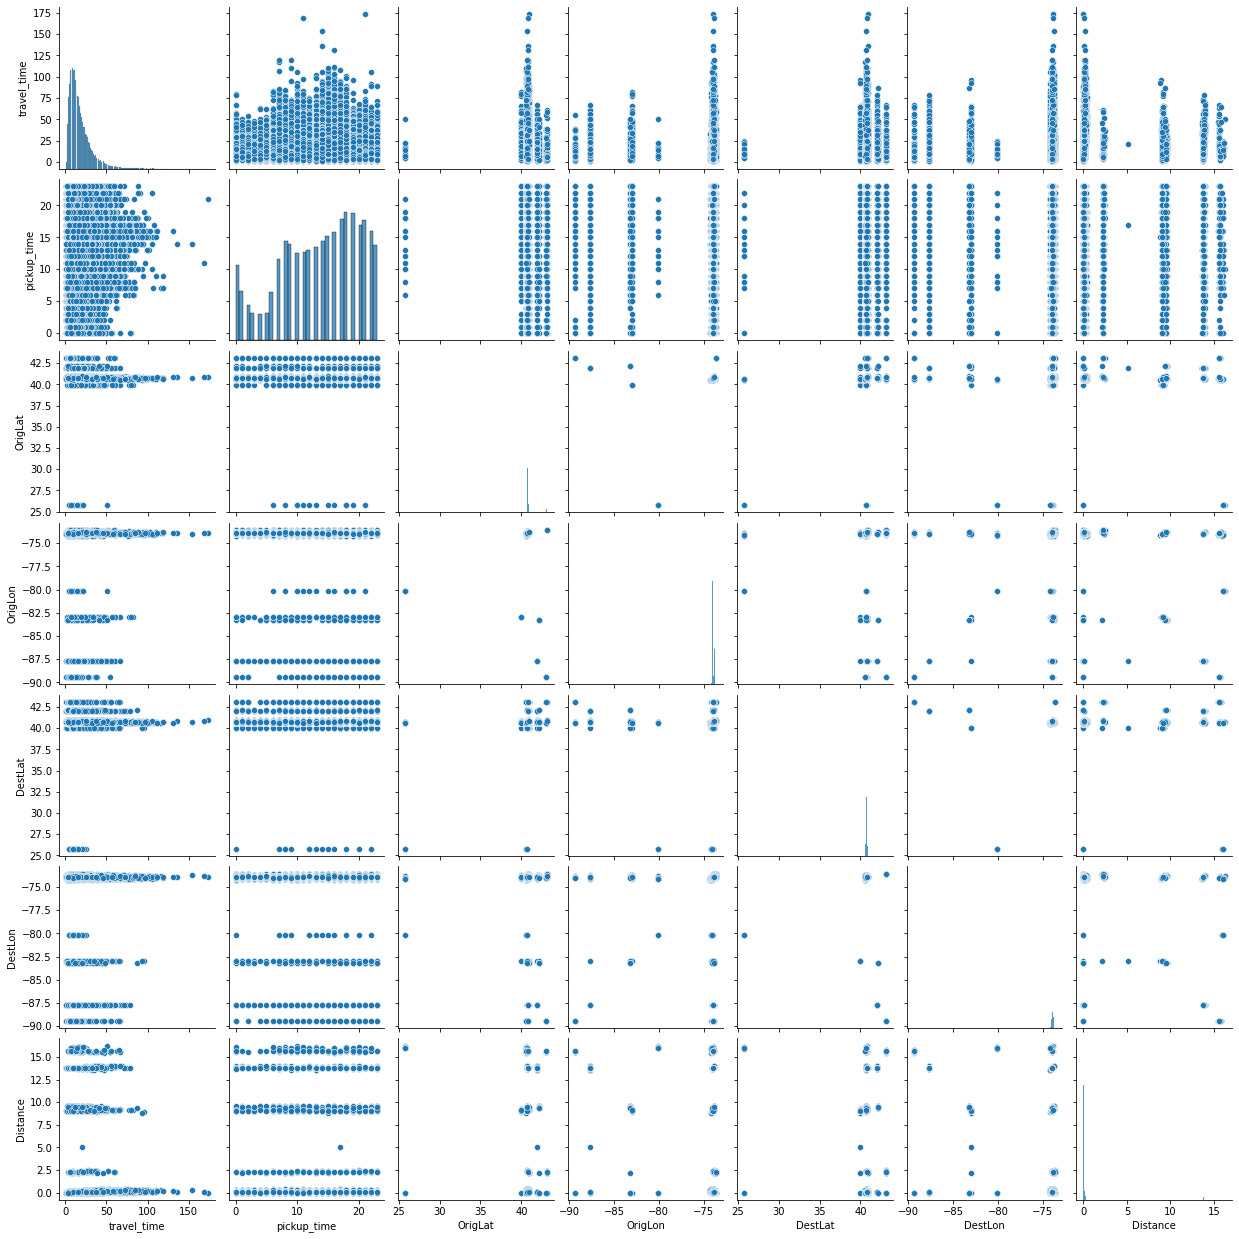

In [31]:
import seaborn as sns

sns.pairplot(test)

Pickup time and travel time both seem to be very evenly distributed. The other metrics seem to be mostly in groups, which would a favor a Classifier like Random Forest.

## Model analytics

MSE: 101.06086169510996
R2: 0.38142487539669256

ROC:


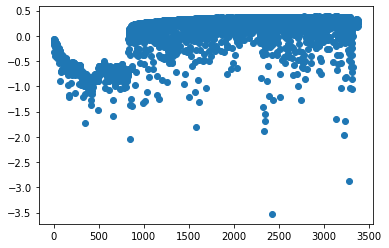

In [30]:
y_pred = clf.predict(X_test_poly)
error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: " + str(error))
print("R2: " + str(r2))
print()
print("ROC:")
scores = pd.read_csv('scores.csv')
plt.scatter(scores.index, scores)
plt.show()
